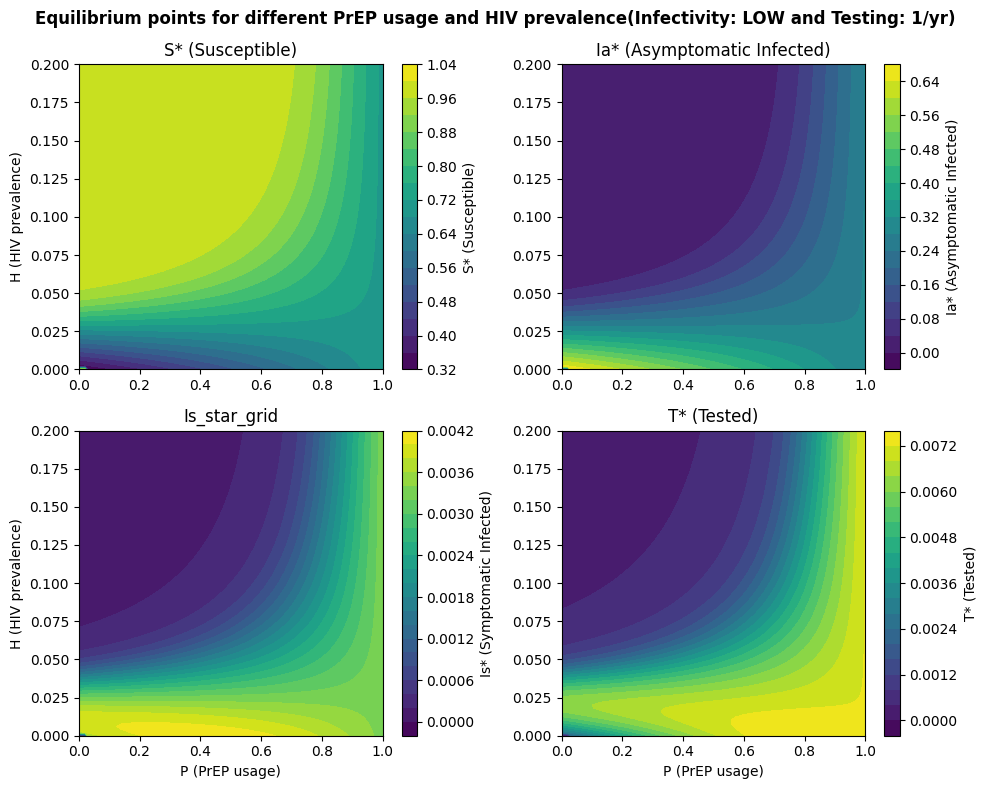

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, fsolve

# Define parameters 
beta_0_STI = 0.0016*5  # Infectivity of STIs we have two values: [high, low] = 0.0016*[7, 5]
lambda_P = 1/360 # Testing scenarios: 4/yr, 2/yr, 1/yr = 4/360, 2/360, 1/360
gamma = 1/1.32/360
tilde_gamma = 1/7
mu = 1.0/45/360
psi = 0.85
lambda_0 = 1/14
Sigma = 0.01/365
#lambda_H = 0.4
C = 50
beta_0_HIV = 0.6341/360

# Define the range for H and P
H_values = np.linspace(0, 0.2, 100)
P_values = np.linspace(0, 1, 100)

# Create storage for results
S_star_grid = np.zeros((100, 100))
Ia_star_grid = np.zeros((100, 100))
Is_star_grid = np.zeros((100, 100))

# Compute equilibrium points for each (H, P) pair
for i, H in enumerate(H_values):
    for j, P in enumerate(P_values):

        # Define auxiliary functions
        def m(H):
            m_min = 0.0
            m_max = 1
            H_thresh = 0.2
            return m_min + (m_max - m_min) * (1 - np.exp(-H / H_thresh))
        
        def Lambda(Ia, Is, H, P):
            return beta_0_STI * (1 - m(H) * (1 - P)) * (Ia + Is)
        
        def lambda_a(P, H):
            return lambda_H(H) * (1 - P) + lambda_P * P
        
        def lambda_s(P, H):
            return lambda_0 + lambda_a(P, H)
        
        def lambda_H(H):
            return C*beta_0_HIV*(1-m(H))*H
        
        # Recalculate lambda_a and lambda_s for current H and P
        def equations(vars):
            S, Ia, Is = vars
            
            eq1 = -Lambda(Ia, Is, H, P) * S + gamma * Ia + tilde_gamma * (1 - (S + Ia + Is)) + mu - mu * S - Sigma
            eq2 = psi * Lambda(Ia, Is, H, P) * S - (gamma + lambda_a(P, H) + mu) * Ia + psi * Sigma
            eq3 = (1 - psi) * Lambda(Ia, Is, H, P) * S - (lambda_s(P, H) + mu) * Is + (1 - psi) * Sigma

            return [eq1, eq2, eq3]

        # Solve the system for current (H, P)
        solution = fsolve(equations, [0.5, 0.1, 0.1])
        S_star_grid[i, j], Ia_star_grid[i, j], Is_star_grid[i, j] = solution

# Plot results for visualization
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot S_star_grid
axs[0, 0].contourf(P_values, H_values, S_star_grid, levels=20, cmap="viridis")
axs[0, 0].set_title('S* (Susceptible)')
axs[0, 0].set_ylabel("H (HIV prevalence)")
fig.colorbar(axs[0, 0].collections[0], ax=axs[0, 0], label="S* (Susceptible)")

# Plot Ia_star_grid
axs[0, 1].contourf(P_values, H_values, Ia_star_grid, levels=20, cmap="viridis")
axs[0, 1].set_title('Ia* (Asymptomatic Infected)')
fig.colorbar(axs[0, 1].collections[0], ax=axs[0, 1], label="Ia* (Asymptomatic Infected)")

# Plot Is_star_grid
axs[1, 0].contourf(P_values, H_values, Is_star_grid, levels=20, cmap="viridis")
axs[1, 0].set_title('Is_star_grid')
axs[1, 0].set_ylabel("H (HIV prevalence)")
axs[1, 0].set_xlabel("P (PrEP usage)")
fig.colorbar(axs[1, 0].collections[0], ax=axs[1, 0], label="Is* (Symptomatic Infected)")

# Plot 1-(S+Ia+Is)
axs[1, 1].contourf(P_values, H_values, (1 - (S_star_grid + Ia_star_grid + Is_star_grid)), levels=20, cmap="viridis")
axs[1, 1].set_title('T* (Tested)')
axs[1, 1].set_xlabel("P (PrEP usage)")
fig.colorbar(axs[1, 1].collections[0], ax=axs[1, 1], label="T* (Tested)")
fig.suptitle("Equilibrium points for different PrEP usage and HIV prevalence(Infectivity: LOW and Testing: 1/yr)", fontweight="bold")
plt.tight_layout()
plt.show()

# min PrEP as a function of $\lambda_P$

C:\Users\PMallick\AppData\Local\Temp\ipykernel_7840\2534544317.py:68: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  critical_points = fsolve(lambda P: np.interp(P, P_values, dN_dP), 0.0)  # Start at 0.5


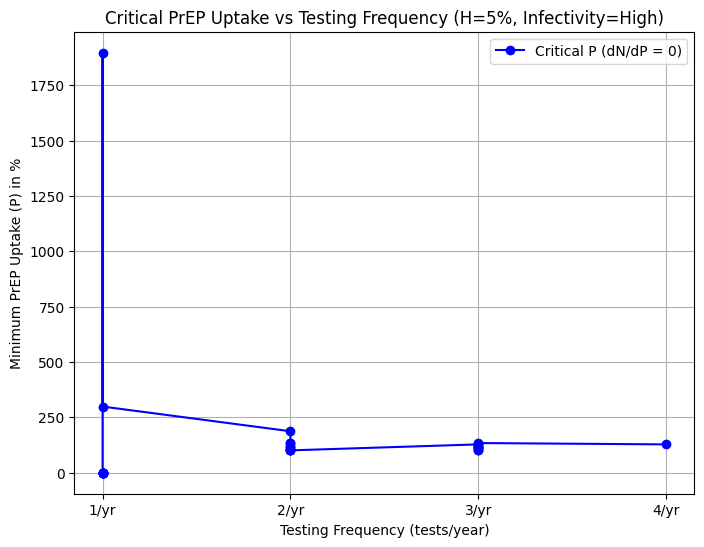

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define parameters
beta_0_STI = 0.0016 * 5
lambda_P_values = [1/360, 1.1/360, 1.2/360, 1.3/360, 1.4/360, 1.5/360, 1.6/360, 1.7/360, 1.8/360, 1.9/360, 2/360, 2.1/360, 2.2/360, 2.3/360, 2.4/360, 2.5/360, 2.6/360, 2.7/360, 2.8/360, 2.9/360, 3/360, 3.1/360, 3.2/360, 3.3/360, 3.4/360, 3.5/360, 3.6/360, 3.7/360, 3.8/360, 3.9/360, 4/360]
gamma = 1 / 1.32 / 360
tilde_gamma = 1 / 7
mu = 1.0 / 45 / 360
psi = 0.85
lambda_0 = 1 / 14
Sigma = 0.01 / 365
C = 50
beta_0_HIV = 0.6341 / 360

# Fixed H value
H = 0.05
P_values = np.linspace(0, 1, 201)

# Auxiliary functions
def m(H):
    m_min = 0.0
    m_max = 1
    H_thresh = 0.2
    return m_min + (m_max - m_min) * (1 - np.exp(-H / H_thresh))

def Lambda(Ia, Is, H, P):
    return beta_0_STI * (1 - m(H) * (1 - P)) * (Ia + Is)

def lambda_a(P, H, lambda_P):
    return lambda_H(H) * (1 - P) + lambda_P * P

def lambda_s(P, H, lambda_P):
    return lambda_0 + lambda_a(P, H, lambda_P)

def lambda_H(H):
    return C * beta_0_HIV * (1 - m(H)) * H

# Function to calculate new cases N(P)
def new_cases(H, P, lambda_P):
    def equations(vars):
        S, Ia, Is = vars
        eq1 = -Lambda(Ia, Is, H, P) * S + gamma * Ia + tilde_gamma * (1 - (S + Ia + Is)) + mu - mu * S - Sigma
        eq2 = psi * Lambda(Ia, Is, H, P) * S - (gamma + lambda_a(P, H, lambda_P) + mu) * Ia + psi * Sigma
        eq3 = (1 - psi) * Lambda(Ia, Is, H, P) * S - (lambda_s(P, H, lambda_P) + mu) * Is + (1 - psi) * Sigma
        return [eq1, eq2, eq3]

    # Solve the system for equilibrium points
    solution = fsolve(equations, [0.5, 0.1, 0.1])
    S, Ia, Is = solution

    # New cases are the inflow of infections
    return Lambda(Ia, Is, H, P) * S

# Calculate critical points and P such that N(P) = N(P=0)
critical_P_values = []
P_equal_N0_values = []

for lambda_P in lambda_P_values:
    # Compute N(P) over P_values
    N_values = np.array([new_cases(H, P, lambda_P) for P in P_values])

    # Calculate dN/dP using numerical differentiation
    dN_dP = np.gradient(N_values, P_values)

    # Find critical points where dN/dP = 0
    critical_points = fsolve(lambda P: np.interp(P, P_values, dN_dP), 0.0)  # Start at 0.5
    critical_P_values.append(critical_points[0]*100)

    # Find P where N(P) = N(P=0)
    N_0 = new_cases(H, 0, lambda_P)
    P_equal_N0 = fsolve(lambda P: np.interp(P, P_values, N_values) - N_0, 0.1)
    P_equal_N0_values.append(P_equal_N0[0])

# # Prepare 1/lambda_P for plotting
# lambda_P_in_days = [1 / lp for lp in lambda_P_values]

# Convert lambda_P values to tests/year for labeling
tests_per_year = [f"{int(360 * lp)}/yr" for lp in lambda_P_values]

# Plot results
plt.figure(figsize=(8, 6))

# Plot critical P values
plt.plot(tests_per_year, critical_P_values, marker='o', linestyle='-', label='Critical P (dN/dP = 0)', color='b')

# # Plot P values where N(P) = N(P=0)
# plt.plot(tests_per_year, P_equal_N0_values, marker='o', linestyle='--', label='P (N(P) = N(0))', color='r')

plt.xlabel('Testing Frequency (tests/year)')
plt.ylabel('Minimum PrEP Uptake (P) in %')
plt.title('Critical PrEP Uptake vs Testing Frequency (H=5%, Infectivity=High)')
#plt.hlines(100.0, 0, len(lambda_P_values)-1, colors='k', linestyles='dashed')
plt.legend()
plt.grid()
plt.show()


C:\Users\PMallick\AppData\Local\Temp\ipykernel_7840\3332430838.py:68: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  critical_points = fsolve(lambda P: np.interp(P, P_values, dN_dP), 0)  # Start at 0.5


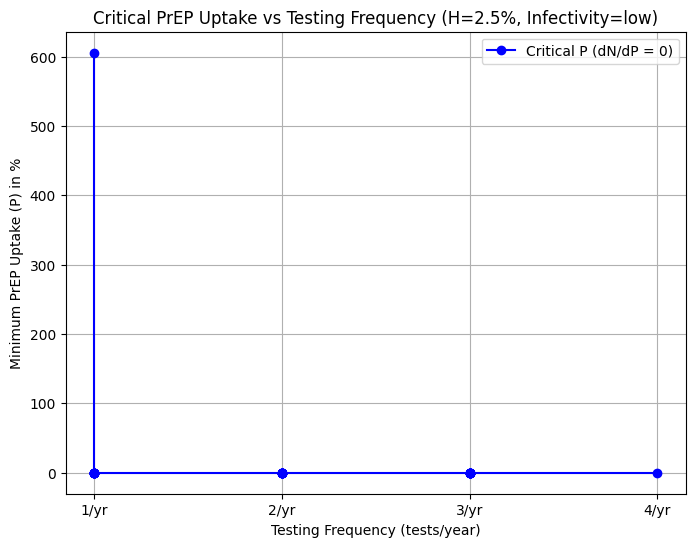

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define parameters
beta_0_STI = 0.0016 * 5
lambda_P_values = [1/360, 1.1/360, 1.2/360, 1.3/360, 1.4/360, 1.5/360, 1.6/360, 1.7/360, 1.8/360, 1.9/360, 2/360, 2.1/360, 2.2/360, 2.3/360, 2.4/360, 2.5/360, 2.6/360, 2.7/360, 2.8/360, 2.9/360, 3/360, 3.1/360, 3.2/360, 3.3/360, 3.4/360, 3.5/360, 3.6/360, 3.7/360, 3.8/360, 3.9/360, 4/360]
gamma = 1 / 1.32 / 360
tilde_gamma = 1 / 7
mu = 1.0 / 45 / 360
psi = 0.85
lambda_0 = 1 / 14
Sigma = 0.01 / 365
C = 50
beta_0_HIV = 0.6341 / 360

# Fixed H value
H = 0.025
P_values = np.linspace(0, 1, 201)

# Auxiliary functions
def m(H):
    m_min = 0.0
    m_max = 1
    H_thresh = 0.2
    return m_min + (m_max - m_min) * (1 - np.exp(-H / H_thresh))

def Lambda(Ia, Is, H, P):
    return beta_0_STI * (1 - m(H) * (1 - P)) * (Ia + Is)

def lambda_a(P, H, lambda_P):
    return lambda_H(H) * (1 - P) + lambda_P * P

def lambda_s(P, H, lambda_P):
    return lambda_0 + lambda_a(P, H, lambda_P)

def lambda_H(H):
    return C * beta_0_HIV * (1 - m(H)) * H

# Function to calculate new cases N(P)
def new_cases(P, lambda_P):
    def equations(vars):
        S, Ia, Is = vars
        eq1 = -Lambda(Ia, Is, H, P) * S + gamma * Ia + tilde_gamma * (1 - (S + Ia + Is)) + mu - mu * S - Sigma
        eq2 = psi * Lambda(Ia, Is, H, P) * S - (gamma + lambda_a(P, H, lambda_P) + mu) * Ia + psi * Sigma
        eq3 = (1 - psi) * Lambda(Ia, Is, H, P) * S - (lambda_s(P, H, lambda_P) + mu) * Is + (1 - psi) * Sigma
        return [eq1, eq2, eq3]

    # Solve the system for equilibrium points
    solution = fsolve(equations, [0.5, 0.1, 0.1])
    S, Ia, Is = solution

    # New cases are the inflow of infections
    return Lambda(Ia, Is, H, P) * S

# Calculate critical points and P such that N(P) = N(P=0)
critical_P_values = []
P_equal_N0_values = []

for lambda_P in lambda_P_values:
    # Compute N(P) over P_values
    N_values = np.array([new_cases(P, lambda_P) for P in P_values])

    # Calculate dN/dP using numerical differentiation
    dN_dP = np.gradient(N_values, P_values)

    # Find critical points where dN/dP = 0
    critical_points = fsolve(lambda P: np.interp(P, P_values, dN_dP), 0)  # Start at 0.5
    critical_P_values.append(critical_points[0]*100)

    # Find P where N(P) = N(P=0)
    N_0 = new_cases(0, lambda_P)
    P_equal_N0 = fsolve(lambda P: np.interp(P, P_values, N_values) - N_0, 0.1)
    P_equal_N0_values.append(P_equal_N0[0])

# # Prepare 1/lambda_P for plotting
# lambda_P_in_days = [1 / lp for lp in lambda_P_values]

# Convert lambda_P values to tests/year for labeling
tests_per_year = [f"{int(360 * lp)}/yr" for lp in lambda_P_values]

# Plot results
plt.figure(figsize=(8, 6))

# Plot critical P values
plt.plot(tests_per_year, critical_P_values, marker='o', linestyle='-', label='Critical P (dN/dP = 0)', color='b')

# # Plot P values where N(P) = N(P=0)
# plt.plot(tests_per_year, P_equal_N0_values, marker='o', linestyle='--', label='P (N(P) = N(0))', color='r')

plt.xlabel('Testing Frequency (tests/year)')
plt.ylabel('Minimum PrEP Uptake (P) in %')
plt.title('Critical PrEP Uptake vs Testing Frequency (H=2.5%, Infectivity=low)')
#plt.hlines(100.0, 0, len(lambda_P_values)-1, colors='k', linestyles='dashed')
plt.legend()
plt.grid()
plt.show()


<>:92: SyntaxWarning: invalid escape sequence '\l'
<>:92: SyntaxWarning: invalid escape sequence '\l'
C:\Users\PMallick\AppData\Local\Temp\ipykernel_11444\2579069331.py:92: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Minimum PrEP uptake vs $\lambda_P$ for H = 5%')


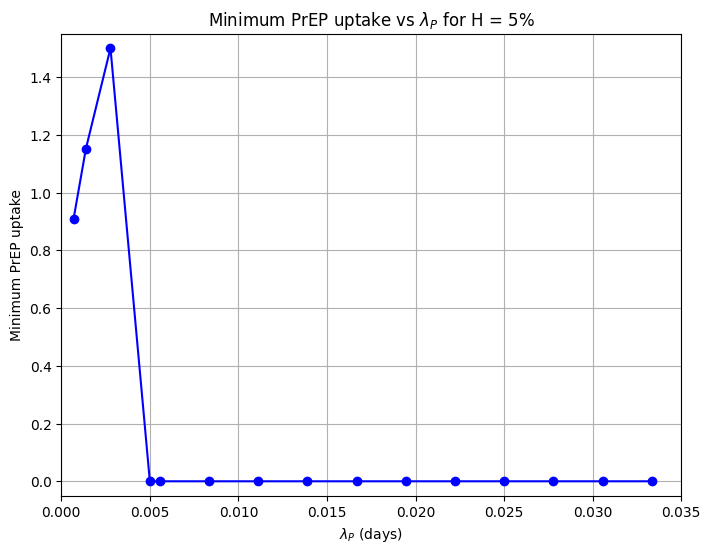

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define parameters 
beta_0_STI = 0.0016*7  # Infectivity of STIs we have two values: [high, low] = 0.0016*[7, 5]
lambda_P_values = [0.25/360, 0.5/360, 1/360, 1.8/360, 2/360, 3/360, 4/360, 5/360, 6/360, 7/360, 8/360, 9/360, 10/360, 11/360, 12/360]
gamma = 1/1.32/360
tilde_gamma = 1/7
mu = 1.0/45/360
psi = 0.85
lambda_0 = 1/14
Sigma = 0.01/365
C = 50
beta_0_HIV = 0.6341/360

# Define the range for P and fix H = 0.05
H = 0.05
P_values = np.linspace(0, 1.5, 100)

# Create storage for minimum P values
min_P_values_for_lambda_P = []

#lambda_P_values = [2/360]

# Loop over lambda_P values
for k, lambda_P in enumerate(lambda_P_values):
    # Create storage for results for this lambda_P
    Ia_values = np.zeros(len(P_values))

    # Compute equilibrium points for each P value
    for j, P in enumerate(P_values):

        # Define auxiliary functions
        def m(H):
            m_min = 0.0
            m_max = 1
            H_thresh = 0.2
            return m_min + (m_max - m_min) * (1 - np.exp(-H / H_thresh))

        def Lambda(Ia, Is, H, P):
            return beta_0_STI * (1 - m(H) * (1 - P)) * (Ia + Is)

        def lambda_a(P, H, lambda_P):
            return lambda_H(H) * (1 - P) + lambda_P * P

        def lambda_s(P, H, lambda_P):
            return lambda_0 + lambda_a(P, H, lambda_P)

        def lambda_H(H):
            return C * beta_0_HIV * (1 - m(H)) * H

        # Recalculate lambda_a and lambda_s for current P
        def equations(vars):
            S, Ia, Is = vars

            eq1 = -Lambda(Ia, Is, H, P) * S + gamma * Ia + tilde_gamma * (1 - (S + Ia + Is)) + mu - mu * S - Sigma
            eq2 = psi * Lambda(Ia, Is, H, P) * S - (gamma + lambda_a(P, H, lambda_P) + mu) * Ia + psi * Sigma
            eq3 = (1 - psi) * Lambda(Ia, Is, H, P) * S - (lambda_s(P, H, lambda_P) + mu) * Is + (1 - psi) * Sigma

            return [eq1, eq2, eq3]

        # Solve the system for current P
        solution = fsolve(equations, [0.5, 0.1, 0.1])
        S, Ia, Is = solution
        Ia_values[j] = Ia
        #print(lambda_P, Ia)

    # Find the P value corresponding to the maximum Ia for this lambda_P
    max_Ia_index = np.argmax(Ia_values)
    min_P_values_for_lambda_P.append(P_values[max_Ia_index])
    #print(Ia_values[k], Ia_values[k + 1])
    # if Ia_values[k] >= Ia_values[k + 1]:
    #     min_P_values_for_lambda_P.append(P_values[k])
    #     #print("P_values",P_values[k])
    # else:
    #     print("Skippping k = ", k)
    #     min_P_values_for_lambda_P.append(1.01)
    #     continue
    #     #print("Ia_values[k]", Ia_values[k], "Ia_values[k + 1]", Ia_values[k + 1])
    # print("P_values",P_values[k], len(min_P_values_for_lambda_P))
#plt.plot(P_values, Ia_values)
#Prepare 1/lambda_P for plotting
lambda_P_in_days = [1 / lp for lp in lambda_P_values]

# Plot Minimum PrEP uptake vs 1/lambda_P
plt.figure(figsize=(8, 6))
plt.plot(lambda_P_values, min_P_values_for_lambda_P, marker='o', linestyle='-', color='b')
plt.xlabel(r'$\lambda_P$ (days)')
plt.ylabel('Minimum PrEP uptake')
plt.axis([0, 0.035, -0.05, 1.55])
plt.title('Minimum PrEP uptake vs $\lambda_P$ for H = 5%')
plt.grid()
plt.show()


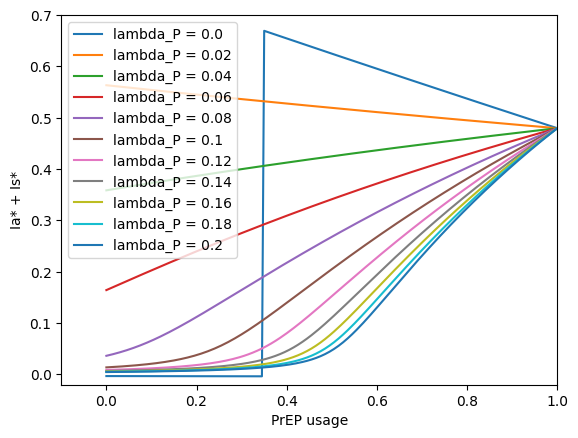

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, fsolve

# Define parameters 
beta_0_STI = 0.0016*7  # Infectivity of STIs we have two values: [high, low] = 0.0016*[7, 5]
lambda_P = 1/360 # Testing scenarios: 4/yr, 2/yr, 1/yr = 4/360, 2/360, 1/360
gamma = 1/1.32/360
tilde_gamma = 1/7
mu = 1.0/45/360
psi = 0.85
lambda_0 = 1/14
Sigma = 0.01/365
#lambda_H = 0.4
C = 50
beta_0_HIV = 0.6341/360
#H= 0.05

# Define the range for H and P
#lambda_P_values = np.linspace(0/360, 15/360, 16)
H_values = np.linspace(0, 0.2, 11)
P_values = np.linspace(0, 1, 201)

# Create storage for results
S_star_grid = np.zeros((11, 201))
Ia_star_grid = np.zeros((11, 201))
Is_star_grid = np.zeros((11, 201))

# Compute equilibrium points for each (H, P) pair
for i, H in enumerate(H_values):
    for j, P in enumerate(P_values):

        # Define auxiliary functions
        def m(H):
            m_min = 0.0
            m_max = 1
            H_thresh = 0.2
            return m_min + (m_max - m_min) * (1 - np.exp(-H / H_thresh))
        
        def Lambda(Ia, Is, H, P):
            return beta_0_STI * (1 - m(H) * (1 - P)) * (Ia + Is)
        
        def lambda_a(P, H, lambda_P):
            return lambda_H(H) * (1 - P) + lambda_P * P
        
        def lambda_s(P, H, lambda_P):
            return lambda_0 + lambda_a(P, H, lambda_P)
        
        def lambda_H(H):
            return C*beta_0_HIV*(1-m(H))*H
        
        # Recalculate lambda_a and lambda_s for current H and P
        def equations(vars):
            S, Ia, Is = vars
            
            eq1 = -Lambda(Ia, Is, H, P) * S + gamma * Ia + tilde_gamma * (1 - (S + Ia + Is)) + mu - mu * S - Sigma
            eq2 = psi * Lambda(Ia, Is, H, P) * S - (gamma + lambda_a(P, H, lambda_P) + mu) * Ia + psi * Sigma
            eq3 = (1 - psi) * Lambda(Ia, Is, H, P) * S - (lambda_s(P, H, lambda_P) + mu) * Is + (1 - psi) * Sigma

            return [eq1, eq2, eq3]

        # Solve the system for current (H, P)
        solution = fsolve(equations, [0.5, 0.1, 0.1])
        S_star_grid[i, j], Ia_star_grid[i, j], Is_star_grid[i, j] = solution

# For all the lambda_P find the array of Ia_star values and then plot it
for i in range(0, len(H_values)):
    plt.plot(P_values, Ia_star_grid[i, :]+Is_star_grid[i,:], label = 'lambda_P = '+str(H_values[i]))
plt.xlabel('PrEP usage')
plt.ylabel('Ia* + Is*')
plt.legend()
plt.axis([-0.1, 1, -0.02, 0.7])
plt.show()

Ia values for LambdaP=0.03333333333333333 [0.0471423  0.03324326 0.0248461  0.01955072 0.01600852 0.01350761
 0.01166126 0.01024808 0.00913441 0.00823557 0.00749562 0.0068763
 0.0063506  0.00589895 0.00550683 0.00516328 0.00485984 0.00458992
 0.00434827 0.00413068 0.00393376 0.00375469 0.00359116 0.00344124
 0.00330331 0.00317597 0.00305807 0.00294858 0.00284665 0.00275152
 0.00266252 0.0025791  0.00250073 0.00242698 0.00235744 0.00229178
 0.00222966 0.00217082 0.002115   0.00206198 0.00201155 0.00196352
 0.00191773 0.00187402 0.00183226 0.00179232 0.00175408 0.00171743
 0.00168229 0.00164855 0.00161614 0.00158497 0.00155499 0.00152611
 0.00149829 0.00147146 0.00144558 0.00142059 0.00139645 0.00137312
 0.00135055 0.00132871 0.00130756 0.00128708 0.00126723 0.00124798
 0.00122931 0.00121118 0.00119359 0.00117649 0.00115988 0.00114373
 0.00112803 0.00111275 0.00109787 0.00108339 0.00106929 0.00105555
 0.00104215 0.0010291  0.00101636 0.00100394 0.00099181 0.00097998
 0.00096842 0.0009571

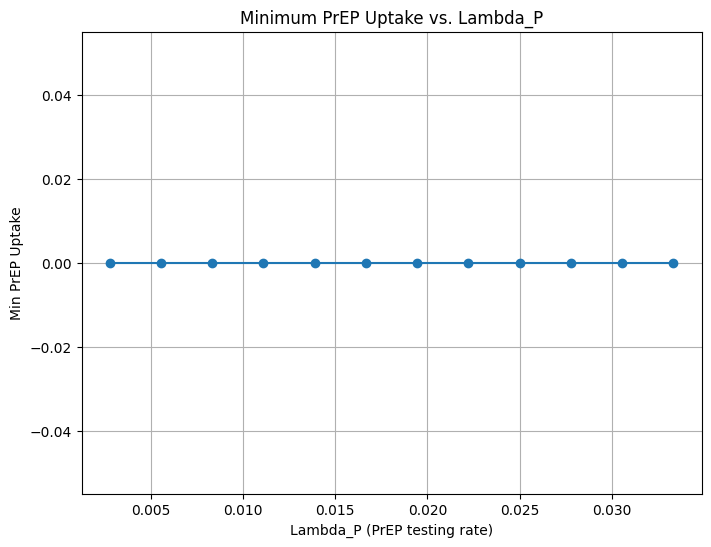

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


# Define parameters 
beta_0_STI = 0.0016*5  # Infectivity of STIs we have two values: [high, low] = 0.0016*[7, 5]
#lambda_P = 1/360 # Testing scenarios: 4/yr, 2/yr, 1/yr = 4/360, 2/360, 1/360
gamma = 1/1.32/360
tilde_gamma = 1/7
mu = 1.0/45/360
psi = 0.85
lambda_0 = 1/14
Sigma = 0.01/365
lambda_H = 0.4
C = 50
beta_0_HIV = 0.6341/360
m_min = 0.0
m_max = 1
H_thresh = 0.2

# Functions
def m(H):
    return m_min + (m_max - m_min) * (1 - np.exp(-H / H_thresh))

def Lambda(Ia, Is, H, P):
    return beta_0_STI * (1 - m(H) * (1 - P)) * (Ia + Is)
        
def lambda_a(P, H, lambda_P):
    return lambda_H(H) * (1 - P) + lambda_P * P

def lambda_s(P, H, lambda_P):
    return lambda_0 + lambda_a(P, H, lambda_P)

def lambda_H(H):
    return C*beta_0_HIV*(1-m(H))*H

def equilibrium_equations(vars, H, P, lambda_P):
    S, Ia, Is = vars
    eq1 = -Lambda(Ia, Is, H, P) * S + gamma * Ia + tilde_gamma * (1 - (S + Ia + Is)) + mu - mu * S - Sigma
    eq2 = psi * Lambda(Ia, Is, H, P) * S - (gamma + lambda_a(P, H, lambda_P) + mu) * Ia + psi * Sigma
    eq3 = (1 - psi) * Lambda(Ia, Is, H, P) * S - (lambda_s(P, H, lambda_P) + mu) * Is + (1 - psi) * Sigma
    return [eq1, eq2, eq3]

# Define range of lambda_P values (e.g., testing every 1, 2, ..., 12 months)
lambda_P_values = np.linspace(12/360, 1/360, 12)  # Adjust range as needed

# Define range of PrEP uptake values (P)
P_values = np.linspace(0, 1, 100)

# Initialize storage for min PrEP values
min_Prep_uptake = np.zeros(len(lambda_P_values))

# Loop over lambda_P values
for i, lambda_P in enumerate(lambda_P_values):
    Ia_values = []

    # Loop over PrEP uptake values
    for P in P_values:
        # Solve for equilibrium
        H = 0.05 
        initial_guess = [0.5, 0.1, 0.1]
        solution = fsolve(equilibrium_equations, initial_guess, args=(H, P, lambda_P))
        S, Ia, Is = solution

        # Store Ia for this P
        Ia_values.append(Ia)

    # Find the peak of Ia(P) (first P where Ia stops increasing)
    Ia_values = np.array(Ia_values)
    print(f"Ia values for LambdaP={lambda_P}",Ia_values)
    for k in range(len(P_values) - 1):
        print(Ia_values[k], Ia_values[k + 1])
        if Ia_values[k] >= Ia_values[k + 1]:
            min_Prep_uptake[i] = P_values[k]
            print("P_values",P_values[k])
            break

print(min_Prep_uptake, lambda_P_values)
# Ensure min_Prep_uptake has the same length as lambda_P_values
#min_Prep_uptake = min_Prep_uptake[:len(lambda_P_values)]

# Plot min PrEP uptake as a function of lambda_P
plt.figure(figsize=(8, 6))
plt.plot(lambda_P_values, min_Prep_uptake, marker="o", linestyle="-")
plt.xlabel("Lambda_P (PrEP testing rate)")
plt.ylabel("Min PrEP Uptake")
plt.title("Minimum PrEP Uptake vs. Lambda_P")
plt.grid()
plt.show()